In [1]:
import numpy as np
import pandas as pd
from pprint import pprint

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding='ISO-8859-1')
print(star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

In [3]:
pprint(star_wars.columns.tolist())

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all '
 'that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your '
 'favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, '
 'unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan 

## Remove NaN entry in RespondentID column

In [4]:
#Because there is only 1 NaN entry in Respondent ID column
#Therefore we will remove that entry without affect to whole DataFrame
star_wars = star_wars[star_wars['RespondentID'].notnull()]
# print(star_wars['RespondentID'].value_counts(dropna=False))

## Convert Yes/No to True/False in these 2 following columns: 
    # Have you seen any of the 6 films in the Star Wars franchise?
    # Do you consider yourself to be a fan of the Star Wars film franchise?

In [5]:
yes_no_map = {
    'Yes': True,
    'No' : False
}
cols = [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
]
print(star_wars[cols[0]].value_counts(dropna=False))
print(star_wars[cols[1]].value_counts(dropna=False))
star_wars[cols[0]] = star_wars[cols[0]].map(yes_no_map)
star_wars[cols[1]] = star_wars[cols[1]].map(yes_no_map)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [6]:
print(star_wars[cols[0]].value_counts(dropna=False))
print(star_wars[cols[1]].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Convert all entries in seen film columns to boolean

In [7]:
true_false_map = {
    "Star Wars: Episode I  The Phantom Menace"  : True,
    "Star Wars: Episode II  Attack of the Clones" : True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope" : True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}
seen_film_cols = [
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
]
for col in seen_film_cols:
    print(star_wars[col].value_counts(dropna=False))
for col in seen_film_cols:
    star_wars[col] = star_wars[col].map(true_false_map)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


In [8]:
for col in seen_film_cols:
    print(star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


## Rename seen film columns for more intuitive

In [9]:
rename_cols = {
 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6',
}
star_wars.rename(columns=rename_cols, inplace=True)
# pprint(star_wars.columns.tolist())

## Convert entries of ranking cols to float
## Also rename those columns for more intuitive

In [10]:
#Convert to float
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].astype(float)
rename_cols = {
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6',
}
star_wars.rename(columns=rename_cols, inplace=True)
# pprint(star_wars.columns.tolist())

In [11]:
print(star_wars.iloc[:, 9:15].mean())

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


## Plot each ranking column to each bar plot

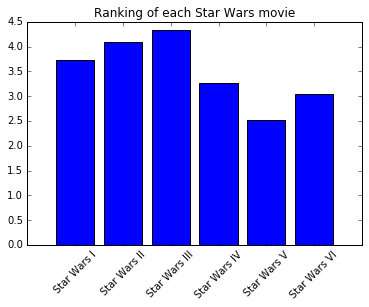

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
film_names = [
    "Star Wars I",
    "Star Wars II",
    "Star Wars III",
    "Star Wars IV",
    "Star Wars V",
    "Star Wars VI"
]
plt.bar(range(6), star_wars.iloc[:, 9:15].mean(), align="center")
plt.xticks(range(6), film_names,rotation=45)
plt.title("Ranking of each Star Wars movie")

In [13]:
#Total views each film
print(star_wars.iloc[:, 3:9].sum())

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


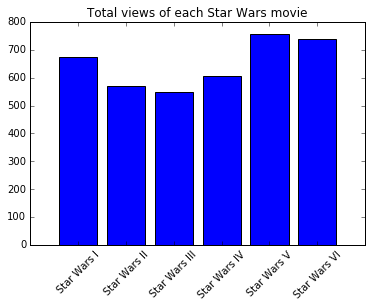

In [14]:
plt.bar(range(6), star_wars.iloc[:, 3:9].sum(), align="center")
plt.xticks(range(6), film_names,rotation=45)
plt.title("Total views of each Star Wars movie")

## Survey which gender is more interested each movie

In [15]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

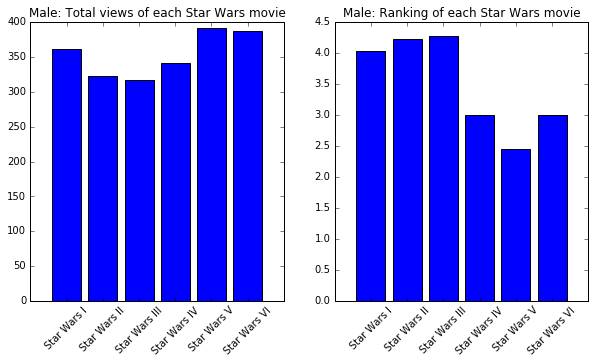

In [16]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
plt.bar(range(6), males.iloc[:,3:9].sum(), align="center")
plt.xticks(range(6), film_names,rotation=45)
plt.title("Male: Total views of each Star Wars movie")
ax= plt.subplot(1,2,2)
plt.bar(range(6), males.iloc[:, 9:15].mean(), align="center")
plt.xticks(range(6), film_names,rotation=45)
plt.title("Male: Ranking of each Star Wars movie")

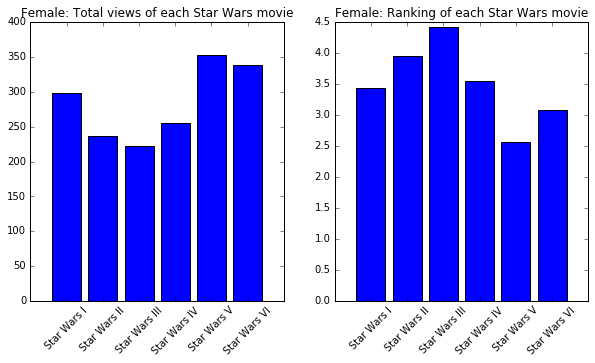

In [17]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
plt.bar(range(6), females.iloc[:,3:9].sum(), align="center")
plt.xticks(range(6), film_names,rotation=45)
plt.title("Female: Total views of each Star Wars movie")
ax= plt.subplot(1,2,2)
plt.bar(range(6), females.iloc[:, 9:15].mean(), align="center")
plt.xticks(range(6), film_names,rotation=45)
plt.title("Female: Ranking of each Star Wars movie")

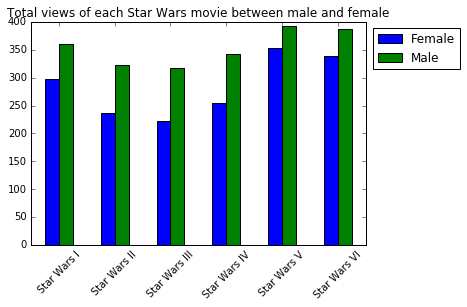

In [18]:
seen_cols = ["seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"]
genders_pv = pd.pivot_table(star_wars, columns='Gender', values=seen_cols, aggfunc=np.sum)
genders_pv.plot(kind='bar')
plt.xticks(range(6), film_names,rotation=45)
plt.title("Total views of each Star Wars movie between male and female")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

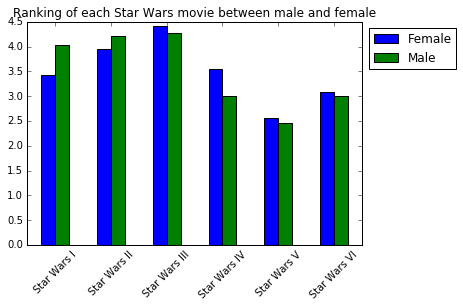

In [64]:
seen_cols = ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]
genders_pv = pd.pivot_table(star_wars, columns='Gender', values=seen_cols)
genders_pv.plot(kind='bar')
plt.xticks(range(6), film_names,rotation=45)
plt.title("Ranking of each Star Wars movie between male and female")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

## Clean character respondents columns

In [20]:
favor_rank = {
    "Very favorably": 6,
    "Somewhat favorably": 5,
    "Neither favorably nor unfavorably (neutral)": 4,
    "Unfamiliar (N/A)": 3,
    "Somewhat unfavorably": 2,
    "Very unfavorably": 1,
    np.NaN: 0
}
for i in range(15,29):
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(favor_rank)

In [27]:
char_favor_cols = star_wars.columns[15:29].tolist()
char_favor_cols_rename = {}
for i in range(len(char_favor_cols)):
    char_favor_cols_rename[char_favor_cols[i]] = 'favor_rank_{}'.format(i+1)

In [30]:
star_wars.rename(columns=char_favor_cols_rename, inplace=True)

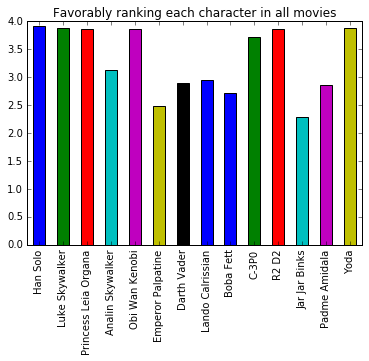

In [61]:
char_favor_means = star_wars[star_wars.columns[15:29]].mean()
char_favor_means.plot(kind='bar')
chars = (
    "Han Solo",
    "Luke Skywalker",
    "Princess Leia Organa",
    "Analin Skywalker",
    "Obi Wan Kenobi",
    "Emperor Palpatine",
    "Darth Vader",
    "Lando Calrissian",
    "Boba Fett",
    "C-3P0",
    "R2 D2",
    "Jar Jar Binks",
    "Padme Amidala",
    "Yoda"
)
plt.xticks(range(14), chars)
plt.title("Favorably ranking each character in all movies")

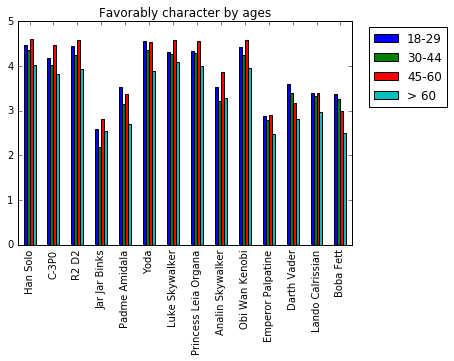

In [67]:
chars = (
    "Han Solo",
    "C-3P0",
    "R2 D2",
    "Jar Jar Binks",
    "Padme Amidala",
    "Yoda",
    "Luke Skywalker",
    "Princess Leia Organa",
    "Analin Skywalker",
    "Obi Wan Kenobi",
    "Emperor Palpatine",
    "Darth Vader",
    "Lando Calrissian",
    "Boba Fett",
)
pv = pd.pivot_table(star_wars, columns='Age', values=star_wars.columns[15:29])
fig = plt.figure(figsize=(20,20))
pv.plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.xticks(range(14), chars)
plt.title("Favorably character by ages")

## Survey views between age and gender

In [82]:
age_gender = star_wars[['Gender', 'Age']].copy()
age_gender['Gender'] = age_gender['Gender'].map({'Male': 1, 'Female': 0, np.NaN: np.NaN})
age_gender_pv = pd.pivot_table(age_gender, index='Age', values='Gender', aggfunc=np.sum)

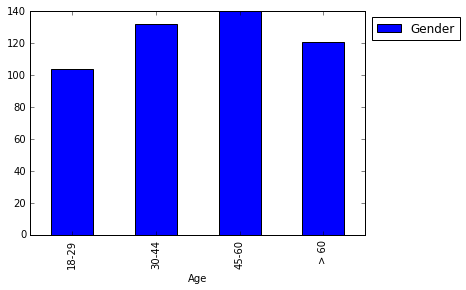

In [89]:
age_gender_pv.plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.3 ,1))